To implement Gradient Descent and Linear Regression (using the Normal Equation and Scikit-Learn) to optimize model parameters and analyze the performance of different optimization techniques on a dataset. The experiment also involves visualizing the convergence of the cost function and comparing the accuracy of each approach.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [8]:
# 1️⃣ Load dataset
df = pd.read_csv("advertising.csv")  # Ensure the dataset file is present in the same directory
print(df)

# 2️⃣ Extract features (TV, Radio, Newspaper) and target variable (Sales)
X = df[['TV', 'Radio', 'Newspaper']].values  # Feature matrix
y = df['Sales'].values.reshape(-1, 1)  # Convert y to a column vector

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]



Theta values from Gradient Descent:
 [[1.51298468e+01]
 [4.66247710e+00]
 [1.58345404e+00]
 [8.55119671e-03]]

Theta values from Normal Equation:
 [[1.51305000e+01]
 [4.66270025e+00]
 [1.58465027e+00]
 [7.29186830e-03]]

Theta values from Scikit-Learn:
 [[4.62512408e+00]
 [5.44457803e-02]
 [1.07001228e-01]
 [3.35657922e-04]]

Comparison of Results:
Theta_0: Gradient Descent = 15.1298, Normal Equation = 15.1305, Scikit-Learn = 4.6251
Theta_1: Gradient Descent = 4.6625, Normal Equation = 4.6627, Scikit-Learn = 0.0544
Theta_2: Gradient Descent = 1.5835, Normal Equation = 1.5847, Scikit-Learn = 0.1070
Theta_3: Gradient Descent = 0.0086, Normal Equation = 0.0073, Scikit-Learn = 0.0003


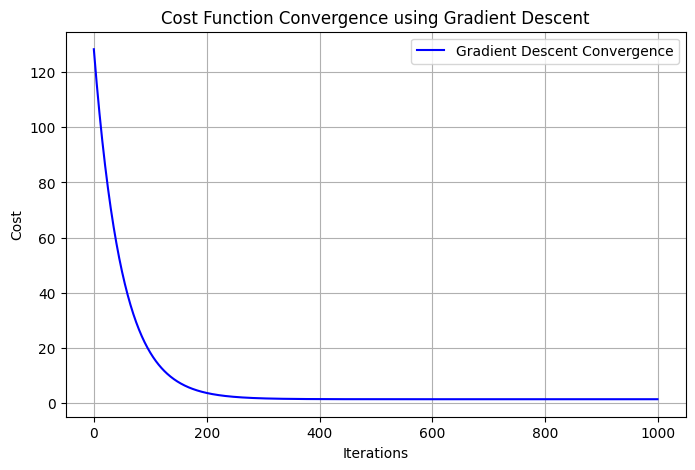

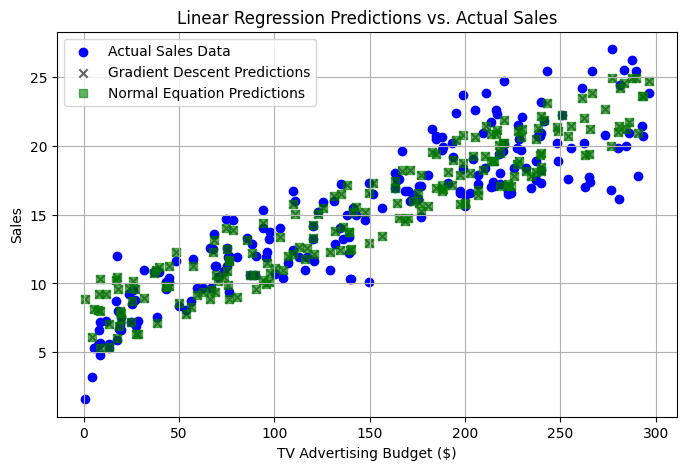

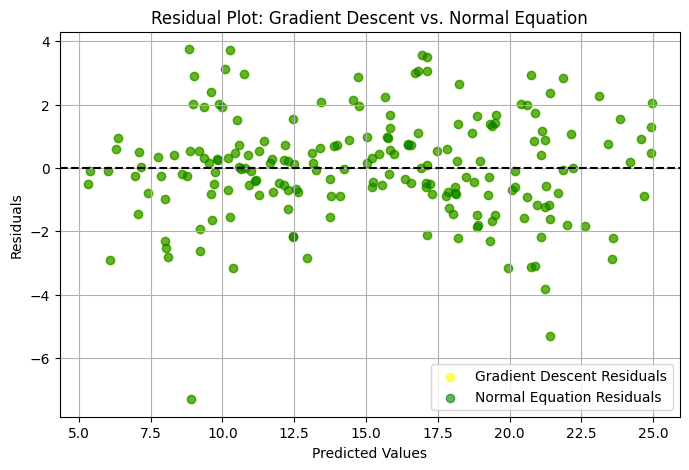


Performance Comparison:
Method               MSE        R² Score  
----------------------------------------
Gradient Descent     2.7060 0.9026
Normal Equation      2.7060 0.9026


In [9]:
X = np.c_[np.ones(X.shape[0]), X]  # Adds a column of ones to the first column

# 4️⃣ Normalize features (excluding the bias term)
X[:, 1:] = (X[:, 1:] - X[:, 1:].mean(axis=0)) / X[:, 1:].std(axis=0)  # Feature Scaling


### ========================= GRADIENT DESCENT ========================= ###
def gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    """
    Performs Gradient Descent to optimize theta values.

    Parameters:
    X (numpy array): Feature matrix (m x n)
    y (numpy array): Target variable (m x 1)
    learning_rate (float): Step size for gradient updates
    iterations (int): Number of iterations

    Returns:
    theta (numpy array): Optimal parameters (n x 1)
    cost_history (list): Cost function values over iterations
    """
    m, n = X.shape  # m = number of samples, n = number of features
    theta = np.zeros((n, 1))  # Initialize parameters (theta) as zeros
    cost_history = []  # Store cost values to visualize convergence

    for _ in range(iterations):
        predictions = X.dot(theta)  # Compute predicted values
        errors = predictions - y  # Compute errors
        cost = (1 / (2 * m)) * np.sum(errors**2)  # Compute cost (Mean Squared Error)
        cost_history.append(cost)  # Store cost

        # Compute gradient (partial derivatives of cost function)
        gradient = (1 / m) * X.T.dot(errors)
        
        # Update theta using gradient descent formula
        theta -= learning_rate * gradient  

    return theta, cost_history
# 5️⃣ Apply Gradient Descent
theta_gd, cost_history = gradient_descent(X, y)

print("\nTheta values from Gradient Descent:\n", theta_gd)

### ========================= NORMAL EQUATION ========================= ###
def normal_equation(X, y):
    """
    Computes theta values using the Normal Equation formula:
    θ = (X^T X)^(-1) X^T y

    Parameters:
    X (numpy array): Feature matrix (m x n)
    y (numpy array): Target variable (m x 1)

    Returns:
    theta (numpy array): Optimal parameters (n x 1)
    """
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# 7️⃣ Apply Normal Equation
theta_ne = normal_equation(X, y)

print("\nTheta values from Normal Equation:\n", theta_ne)

### ========================= SCIKIT-LEARN LINEAR REGRESSION ========================= ###
# 8️⃣ Train Linear Regression Model using Scikit-Learn
model = LinearRegression()
model.fit(df[['TV', 'Radio', 'Newspaper']], df['Sales'])

# Extract theta values (Intercept + Coefficients)
theta_sklearn = np.vstack(([model.intercept_], model.coef_.reshape(-1, 1)))

print("\nTheta values from Scikit-Learn:\n", theta_sklearn)

### ========================= COMPARE RESULTS ========================= ###
print("\nComparison of Results:")
for i in range(len(theta_gd)):
    print(f"Theta_{i}: Gradient Descent = {theta_gd[i][0]:.4f}, Normal Equation = {theta_ne[i][0]:.4f}, Scikit-Learn = {theta_sklearn[i][0]:.4f}")
    



# Predict values using all three methods
y_pred_gd = X.dot(theta_gd)   # Predictions from Gradient Descent
y_pred_ne = X.dot(theta_ne)   # Predictions from Normal Equation
y_pred_sklearn = model.predict(df[['TV', 'Radio', 'Newspaper']])  # Predictions from Scikit-Learn

#Compute Residual for gradient descent and Normal Equation
residuals_gd = y- y_pred_gd
residuals_ne = y - y_pred_ne

# 1️⃣ Plot Cost Function Convergence
plt.figure(figsize=(8, 5))
plt.plot(range(len(cost_history)), cost_history, label="Gradient Descent Convergence", color="blue")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Convergence using Gradient Descent")
plt.legend()
plt.grid()
plt.show()

# 2️⃣ Actual vs Predicted Sales Plot
plt.figure(figsize=(8, 5))
plt.scatter(df['TV'], y, color='blue', label="Actual Sales Data")  # Actual data points
plt.scatter(df['TV'], y_pred_gd, color='black', label="Gradient Descent Predictions", alpha=0.6, marker='x')  # GD Predictions
plt.scatter(df['TV'], y_pred_ne, color='green', label="Normal Equation Predictions", alpha=0.6, marker='s')  # NE Predictions


# Labels and title - Actual vs Predicted Sales Plot 
plt.xlabel("TV Advertising Budget ($)")
plt.ylabel("Sales")
plt.title("Linear Regression Predictions vs. Actual Sales")
plt.legend()
plt.grid()
plt.show()

#Create the residual plot 
plt.figure(figsize=(8,5))
plt.scatter(y_pred_gd, residuals_gd, color="yellow", alpha = 0.6, label="Gradient Descent Residuals")
plt.scatter(y_pred_gd, residuals_gd, color="green", alpha = 0.6, label="Normal Equation Residuals")

# Add a horizontal line at y=0
plt.axhline(y=0, color="black", linestyle="--")

# Labels and title - Residual plot "Gradient Descent vs Normal Equation"
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot: Gradient Descent vs. Normal Equation")
plt.legend()
plt.grid()
plt.show()

# Compute Predictions using Gradient Descent
y_pred_gd = X.dot(theta_gd)

# Compute Predictions using Normal Equation
y_pred_ne = X.dot(theta_ne)

# Compute MSE for both methods
mse_gd = mean_squared_error(y, y_pred_gd)
mse_ne = mean_squared_error(y, y_pred_ne)

# Compute R-squared for both methods
r2_gd = r2_score(y, y_pred_gd)
r2_ne = r2_score(y, y_pred_ne)

# Print Comparison of MSE and R² Score
print("\nPerformance Comparison:")
print(f"{'Method':<20} {'MSE':<10} {'R² Score':<10}")
print("-" * 40)
print(f"{'Gradient Descent':<20} {mse_gd:.4f} {r2_gd:.4f}")
print(f"{'Normal Equation':<20} {mse_ne:.4f} {r2_ne:.4f}")